## 한글 형태소 분석 ,시각화, 워드 클라우드 등. 
### 형태소 분석, 품사 태깅. 
### 데이터 : 샘플 데이터 , 페이스북 전자 신문에서 크롤링 한 임시 데이터로  대체 
### 설치 가 조금 복잡함.
### 1) jdk 17 이상 2) JPype(자바, 파이썬 연결하는 도구) 3) konlpy 패키지 설치. 

## 주의사항, JPype 버전 1.4,  파이썬 버전 3.10.7 다운그레이드 
## 시스템 환경 변수 , ex) JAVA_HOME : 경로 추가 하기. jdk 17
### 변수명 : JAVA_HOME (동일하게)
### 시스템 환경 변수의 경로 값 예제: C:\Program Files\Java\jdk-17
### 변수명 : Path
### 경로 : C:\Program Files\Java\jdk-17\bin

## 파이썬 3.10.x , 예) 3.10.7 버전으로 다운 받기. 
### 시스템 환경 변수 추가 작업

### 변수명 : Path
### 경로C:\Python\Python39\

### 변수명 : Path
### 경로C:\Python\Python39\Scripts

### cmd -> python -V

## 2) JPype(자바, 파이썬 연결하는 도구)
### 다운로드 사이트 주소 : https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 
## 사이트 다운로드 주소 변경 : https://github.com/jpype-project/jpype/releases
### ex) 파일명 : JPype1-1.4.1-cp310-cp310-win_amd64.whl
### JPype 검색하고, 버전은 JPype1‑1.4.0‑cp310‑cp310‑win_amd64.whl 받아서, 
### 해당 다운로드 받은 폴더 이동하고, 해당 폴더 검색경로에서, cmd 실행하고, 
### cmd -> pip install JPype1‑1.4.0‑cp310‑cp310‑win_amd64.whl
### 업그레이드 경고창 뜨면 : 
### python.exe -m pip install --upgrade pip
### 업그레이드 후 , 다시 설치 
### pip install JPype1‑1.4.0‑cp310‑cp310‑win_amd64.whl
### , 명령어 붙여넣기. 
### pip install konlpy 

### 코드 실행시, 설치한(다운그레이드한 버전, 3.10.7) 선택, 
### 해당 쥬피터 노트북 관련 커널 설치도 자동으로 함. 




# 용어 정리 
## 형태소 , 형태소 분석
### 형태소: 언어에서 의미가 가장 작은 단위. 
### 형태소 분석: 형태소, 어근, 접두사/접미사, 품사 등 다양한 속성 구조. 
### 품사 태깅 예) 상용 이가 좋아 하는 음식 은 국밥 이다. 
### 음식 : NNG, 이가/JKM , 좋아하는/VV, 이다/EFN , 높임말 : 하신다 -> 신/EPH
### 품사 태깅 해주는 패키지 : Hananum, Kkma, Komoran, Okt(Twitter 제공)
### Okt , 명사 /Noun , 에/ Josa, 먹는/ Verb , 다/Eomi 

# 샘플 데이터 사용. 
# 

In [2]:
# 최초 실행 때는, 설치 후에 주석하기. 
# !pip install matplotlib
# !pip install wordcloud
# !pip install konlpy

In [2]:
import json
import re 
# Okt , 한글 품사 태깅하기위한 모듈, 도구.
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc 
from wordcloud import WordCloud 



In [3]:
# 샘플 데이터 읽어서, 메모리에서 확인해보기. 
inputFileName = "./sampleNateNews.json"
data = json.loads(open(inputFileName,"r",encoding = "utf-8").read())
data

[{'subject': ' 떡 드세요  박세리  쏟아진 명언집   3 5% 으뜸 파리올림픽 '},
 {'subject': '숨진 권익위 간부 사망 사건  부검 없이 종결키로'},
 {'subject': '기자회견 중 쓰러진 김예지  회복 후 병원 이송'},
 {'subject': '하윤경  권모술수 주종혁  실제 성격은 큐트보이  12시엔 '},
 {'subject': '엔하이픈  ROMANCE   UNTOLD   日 레코드협회 첫  플래티넘  인증 획득'},
 {'subject': '광주 전남 7월 주식 시장 활발 삼성전자 가장 많이 거래'},
 {'subject': '김재중  16년만 드디어 SBS  인기가요  출격 SM 퇴사 후 처음'},
 {'subject': '가평군   칼봉산휴양림 목공체험장 운영  민간 위탁 체결'},
 {'subject': 'SM  전직원에 20억 스톡그랜트 지급 1인당 50주'},
 {'subject': '넘어지려는 노인 잡아줬는데  폭행  신고 CCTV로 억울함 밝혀내'},
 {'subject': '與  김경수 복권 여야 협치 구심점 될 것 '},
 {'subject': ' 야 4885  영화  추격자  실존인물  마약 판매로 검거 무슨 일'},
 {'subject': '24살 BJ와 포착된 방시혁  관광지 안내해준 것뿐 '},
 {'subject': '롯데물산  두 번째 지속가능경영보고서 발간  2040 탄소중립 로드맵 실천 강화 '},
 {'subject': '구급차로 옮겨지는 김예지 선수'},
 {'subject': '환하게 웃으며 답변하는 김예지'},
 {'subject': '오직 마카오에서만  일상탈출 액티비티 8'},
 {'subject': '이스라엘 공격 고심하는 이란  가자 휴전시 보복안 폐기 검토 '},
 {'subject': '파리올림픽 10m 공기권총 은메달리스트 김예지 선수 환영식'},
 {'subject': '박형수  완벽한 캐릭터 소화력으로 선보일  폭군  속  조 과장 '},
 {'subject': 

In [4]:
# 해당 데이터에서, 기사 내용인 , message 부분의 값 추출 작업. 
# 임시 저장 문자열
message = ""
# data = [{딕션너리1},{딕션너리2},{딕션너리3},...]
for item in data:
  if "subject" in item.keys():
    # (\w : 문자, 숫자 의미 ) 앞에 ^(not) 가 아닌 것은 모두 -> 공백으로 변경함. 
    # 하나의 임시 메세지 문자열 변수에 담기
    message = message + re.sub(r"[^\w]"," ", item["subject"]) + ""
message

' 떡 드세요  박세리  쏟아진 명언집   3 5  으뜸 파리올림픽 숨진 권익위 간부 사망 사건  부검 없이 종결키로기자회견 중 쓰러진 김예지  회복 후 병원 이송하윤경  권모술수 주종혁  실제 성격은 큐트보이  12시엔 엔하이픈  ROMANCE   UNTOLD   日 레코드협회 첫  플래티넘  인증 획득광주 전남 7월 주식 시장 활발 삼성전자 가장 많이 거래김재중  16년만 드디어 SBS  인기가요  출격 SM 퇴사 후 처음가평군   칼봉산휴양림 목공체험장 운영  민간 위탁 체결SM  전직원에 20억 스톡그랜트 지급 1인당 50주넘어지려는 노인 잡아줬는데  폭행  신고 CCTV로 억울함 밝혀내與  김경수 복권 여야 협치 구심점 될 것  야 4885  영화  추격자  실존인물  마약 판매로 검거 무슨 일24살 BJ와 포착된 방시혁  관광지 안내해준 것뿐 롯데물산  두 번째 지속가능경영보고서 발간  2040 탄소중립 로드맵 실천 강화 구급차로 옮겨지는 김예지 선수환하게 웃으며 답변하는 김예지오직 마카오에서만  일상탈출 액티비티 8이스라엘 공격 고심하는 이란  가자 휴전시 보복안 폐기 검토 파리올림픽 10m 공기권총 은메달리스트 김예지 선수 환영식박형수  완벽한 캐릭터 소화력으로 선보일  폭군  속  조 과장 질의에 답변하는 김예지 선수최정 삼진 추신수 병살타 데뷔 첫 10SV 작성 ERA 10 80 9 56 시절에서 이렇게 달라지다니  히어로즈 최후의 1차지명 약속 지켰다그날의 충돌 이후 효자 외인 떠나고  최고참도 시즌 아웃  내년에도 키움에서 볼 수 있나 2억원대  중고거래 사기 일당 항소심서 감형 경쟁률 70대 1  낙산사  나는 절로  주형환 저출산위 부위원장   나는 둘로  돼 돌아가길 카카오게임즈   프렌즈팝  9주년 업데이트 사전등록 실시 유상임 아들 美 불법체류 당시 마리화나 의혹  野  과기장관 후보 사퇴 요구구급차 불렀는데 출동 경찰 총격에 20대 한인여성 사망 종합 임영웅  팬클럽  영웅바라기 서포터즈  파주시장애인복지관에 데뷔 8주년 기념 

In [5]:
# 품사 태깅, Okt 패키지 사용하기. 
nlp = Okt()
message_N = nlp.nouns(message)
message_N


['떡',
 '박세리',
 '명언',
 '집',
 '으뜸',
 '파리올림픽',
 '권익위',
 '간부',
 '사망',
 '사건',
 '부검',
 '종결',
 '기자회견',
 '중',
 '김예지',
 '회복',
 '후',
 '병원',
 '송하윤',
 '경',
 '권모술수',
 '주종',
 '혁',
 '실제',
 '성격',
 '큐트',
 '보이',
 '하이픈',
 '레코드',
 '협회',
 '첫',
 '플래티넘',
 '인증',
 '획득',
 '광주',
 '전남',
 '주식',
 '시장',
 '활발',
 '삼성',
 '전자',
 '가장',
 '거래',
 '김재중',
 '인기가요',
 '출격',
 '퇴사',
 '후',
 '처음',
 '가평군',
 '칼봉산',
 '휴양림',
 '목공',
 '체험',
 '운영',
 '민간',
 '위탁',
 '체결',
 '직원',
 '스톡',
 '그랜트',
 '지급',
 '주',
 '노인',
 '폭행',
 '신고',
 '로',
 '김경수',
 '복권',
 '여야',
 '협치',
 '구심',
 '점',
 '것',
 '영화',
 '추격자',
 '실존',
 '인물',
 '마약',
 '판매',
 '검거',
 '무슨',
 '일',
 '살',
 '포착',
 '방시혁',
 '관광지',
 '안내',
 '것',
 '롯데',
 '물산',
 '두',
 '가능',
 '보고서',
 '발간',
 '탄소',
 '중립',
 '로드맵',
 '실천',
 '강화',
 '구급차',
 '김예지',
 '선수',
 '답변',
 '김예지',
 '오직',
 '마카오',
 '일상',
 '탈출',
 '액',
 '티비',
 '티',
 '이스라엘',
 '공격',
 '고심',
 '이란',
 '휴전',
 '시',
 '보복',
 '안',
 '폐기',
 '검토',
 '파리올림픽',
 '공기권총',
 '은메달',
 '리스트',
 '김예지',
 '선수',
 '환영',
 '박형수',
 '캐릭터',
 '소화',
 '폭',
 '속',
 '조',
 '과장',
 '질의',
 '답변',
 '김예지',
 '선수'

In [6]:
# 집계 데이터 기본 탐색, 모델 구축 하기. 
count = Counter(message_N)
count

Counter({'외국인': 73,
         '포착': 65,
         '수급': 65,
         '주가': 63,
         '장': 63,
         '김예지': 57,
         '증권': 50,
         '리포트': 47,
         '브리핑': 47,
         '목표': 45,
         '매수': 44,
         '중': 43,
         '기관': 40,
         '포토': 39,
         '동시': 39,
         '회복': 34,
         '사격': 33,
         '연속': 32,
         '위': 30,
         '기자회견': 29,
         '파리올림픽': 28,
         '종합': 25,
         '선수': 24,
         '한국': 24,
         '행진': 24,
         '제': 23,
         '청문회': 22,
         '삼성': 20,
         '은메달': 19,
         '현대차': 19,
         '올림픽': 19,
         '사진': 19,
         '최고': 18,
         '실신': 18,
         '한복': 18,
         '사망': 16,
         '혁': 16,
         '후': 15,
         '첫': 15,
         '더': 15,
         '병원': 14,
         '주종': 14,
         '복권': 14,
         '것': 14,
         '요구': 14,
         '전': 14,
         '경': 13,
         '김경수': 13,
         '공개': 13,
         '영업': 13,
         '개최': 13,
         '명': 13,
         '

In [7]:
# 임시 딕션너리에 담아서, 필요한 부분 추출해서 조사. 
word_count = dict()

# 상위 80개 정도 
for tag, counts in count.most_common(100):
  if(len(str(tag))>1):
    word_count[tag] = counts
    # print(f" tag : {tag}, counts : {counts}")
word_count

{'외국인': 73,
 '포착': 65,
 '수급': 65,
 '주가': 63,
 '김예지': 57,
 '증권': 50,
 '리포트': 47,
 '브리핑': 47,
 '목표': 45,
 '매수': 44,
 '기관': 40,
 '포토': 39,
 '동시': 39,
 '회복': 34,
 '사격': 33,
 '연속': 32,
 '기자회견': 29,
 '파리올림픽': 28,
 '종합': 25,
 '선수': 24,
 '한국': 24,
 '행진': 24,
 '청문회': 22,
 '삼성': 20,
 '은메달': 19,
 '현대차': 19,
 '올림픽': 19,
 '사진': 19,
 '최고': 18,
 '실신': 18,
 '한복': 18,
 '사망': 16,
 '병원': 14,
 '주종': 14,
 '복권': 14,
 '요구': 14,
 '김경수': 13,
 '공개': 13,
 '영업': 13,
 '개최': 13,
 '코로나': 13,
 '신고': 12,
 '위해': 12,
 '서울': 12,
 '교육': 12,
 '지역': 12,
 '개월': 12,
 '검사': 12,
 '탄핵': 12,
 '트럼프': 12,
 '운영': 11,
 '체결': 11,
 '정책': 11,
 '지원': 11,
 '실적': 11,
 '인상': 11,
 '이송': 11,
 '공급': 11,
 '로봇': 11,
 '국민': 11,
 '방송': 11,
 '지속': 10,
 '대상': 10,
 '성장': 10,
 '하윤': 10,
 '네이버': 10,
 '화재': 10,
 '파리': 10,
 '교육청': 10,
 '출석': 10,
 '관련': 10,
 '광주': 9,
 '답변': 9,
 '실시': 9,
 '경찰': 9,
 '세계': 9}

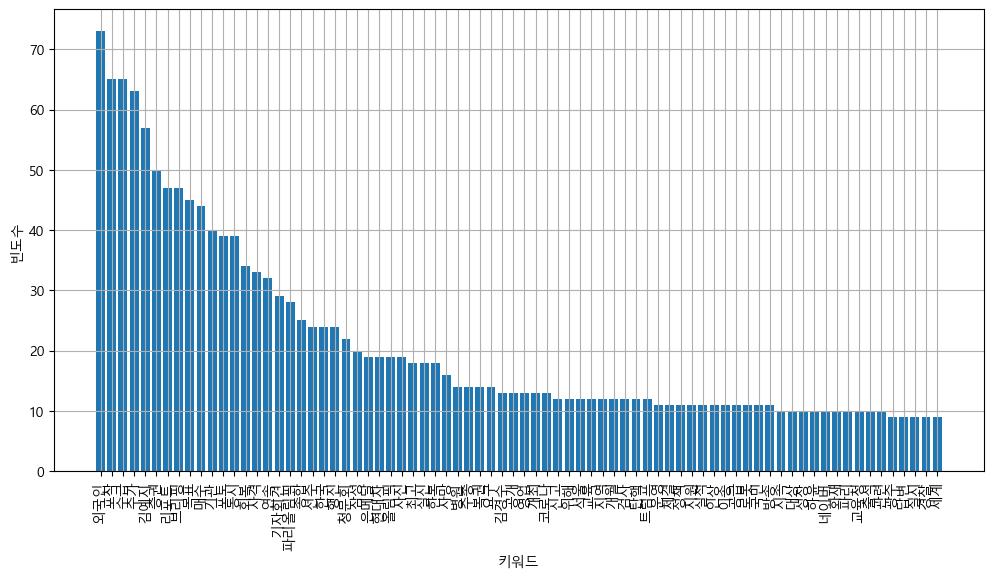

In [8]:
# 시각화1, 막대 그래프 
# 폰트 임포트 , 메모리에 설정 
font_path = "c:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family = font_name)

#, x축, y축, 가로x세로 비율, x 라벨, 폰트 설정 등
plt.figure(figsize=(12,6))
plt.xlabel("키워드")
plt.ylabel("빈도수")
plt.grid(True)

# 딕션너리의 키, 값 , 정렬 내림차순 
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(),reverse=True)

# 막대 그래프 그리기. 
plt.bar(range(len(word_count)), sorted_Values, align="center")

# x 축 라벨 설정. 
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = "vertical")

plt.show()

In [10]:
# !pip install Numpy

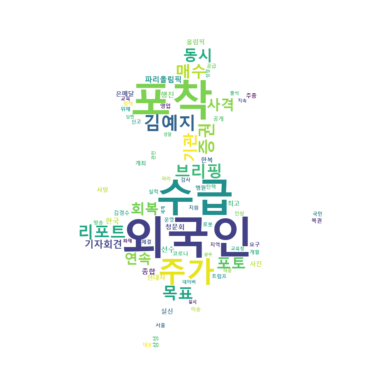

In [9]:
# 시각화2, 워드 클라우드 
import numpy as np

import os
import re
from PIL import Image
from os import path

alice_mask = np.array(Image.open("alice_mask.png"))

# 실행시, 한글이 깨져서, 해당 폰트 패스 경로 지정 필요.
wc = WordCloud(font_path, background_color="white", max_words=1000, mask=alice_mask,width=800,height=1000)
# generate word cloud
sampleImage = wc.generate_from_frequencies(word_count)

# show
plt.imshow(sampleImage, interpolation="bilinear")
# plt.imshow(sampleImage)

plt.axis("off")
plt.show()

In [10]:
# 해당 출력을 이미지로 저장 하기. 
sampleImage.to_file(inputFileName + "_cloud2.jpg")